# Final CHO Model
This notebook is to asses the validity of our reconstruction and how complete it is.

[1. Generation of the dataset and model reconstruction](#generation) <br>
&nbsp;&nbsp;&nbsp;&nbsp;**1.1 Retrieve information from the Google Sheet datasets reactions and metabolites**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**1.2 Build a model and feed it the information from the df generated** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**1.3 Save and validate the model** <br>

[2. Identification of Blocked Reactions and Dead-End Metabolites](#blocked&deadends) <br>
&nbsp;&nbsp;&nbsp;&nbsp;**2.1 Retrieve information from the Google Sheet datasets reactions and metabolites**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**2.2 Build a model and feed it the information from the df generated** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**2.3 Save and validate the model** <br>

[3. Generation of the Mass Flow Graph](#MFG) <br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.1 Generation of the "D-Matrix"**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.2 Plotting the "D-Matrix", Normalized Flow Graph (NFG)** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.3 Generation of the "FluxOpenValue" matrix** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.4 Generation of the "Mass Flow Graph (MFG) Matrix"** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**3.5 Plotting the "MFG Matrix"** <br>

## 1. Generation of the dataset and model reconstruction <a id='generation'></a>
Here we generate the CHO model from the dataset stored in the Google Sheet file. We first use the google_sheet module to extract all the necessary information from the original dataset. Then we use those dataset and the COBRApy library to: (1) Create a new model and add reactions from the **Rxns Sheet**, (2) Add information on each reaction obtained from the **Rxns Sheet** and **Attributes Sheet**, (3) Add boundary reactions from the **BoundaryRxns Sheet**, and (4) Add information for each metabolite from the **Metabolites Sheet**. Finally we save the model as a SBML file and validate it using the cobrapy built-in function "validate_sbml_model( )".

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.io import validate_sbml_model, write_sbml_model
from tqdm.notebook import tqdm
from google_sheet import GoogleSheet

### 1.1 Retrieve information from the Google Sheet datasets reactions and metabolites

In [2]:
##### ----- Generate datasets from Google Sheet ----- #####

#Credential file
KEY_FILE_PATH = 'credentials.json'

# #CHO Network Reconstruction + Recon3D_v2 Google Sheet ID
# SPREADSHEET_ID = '1MlBXeHIKw8k8fZyXm-sN__AHTRSunJxar_-bqvukZws'

#CHO Network Reconstruction + Recon3D_v3 Google Sheet ID
SPREADSHEET_ID = '1MlBXeHIKw8k8fZyXm-sN__AHTRSunJxar_-bqvukZws'

# Initialize the GoogleSheet object
sheet = GoogleSheet(SPREADSHEET_ID, KEY_FILE_PATH)

# Read data from the Google Sheet
sheet_met = 'Metabolites'
sheet_rxns = 'Rxns'
sheet_attributes = 'Attributes'
sheet_boundary = 'BoundaryRxns'

metabolites = sheet.read_google_sheet(sheet_met)
rxns = sheet.read_google_sheet(sheet_rxns)
rxns_attributes = sheet.read_google_sheet(sheet_attributes)
boundary_rxns = sheet.read_google_sheet(sheet_boundary)

### 1.2 Build a model and feed it the information from the df generated

In [3]:
##### ----- Create a model and add reactions ----- #####
model = Model("iCHO")
lr = []
for _, row in rxns.iterrows():
    r = Reaction(row['Reaction'])
    lr.append(r)    
model.add_reactions(lr)
model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-24


<Model iCHO at 0x14ba95f90>

In [4]:
##### ----- Add information to each one of the reactions ----- #####
for i,r in enumerate(tqdm(model.reactions)):
    print(r.id)
    r.build_reaction_from_string(rxns['Reaction Formula'][i])
    r.name = rxns['Reaction Name'][i]
    r.subsystem = rxns['Subsystem'][i]
    r.gene_reaction_rule = str(rxns['GPR_final'][i])
    r.lower_bound = float(rxns_attributes['Lower bound'][i])
    r.upper_bound = float(rxns_attributes['Upper bound'][i])    

  0%|          | 0/10692 [00:00<?, ?it/s]

10FTHF5GLUtl
unknown metabolite '10fthf5glu_c' created
unknown metabolite '10fthf5glu_l' created
10FTHF5GLUtm
unknown metabolite '10fthf5glu_m' created
10FTHF6GLUtl
unknown metabolite '10fthf6glu_c' created
unknown metabolite '10fthf6glu_l' created
10FTHF6GLUtm
unknown metabolite '10fthf6glu_m' created
10FTHF7GLUtl
unknown metabolite '10fthf7glu_c' created
unknown metabolite '10fthf7glu_l' created
10FTHF7GLUtm
unknown metabolite '10fthf7glu_m' created
10FTHFtl
unknown metabolite '10fthf_c' created
unknown metabolite '10fthf_l' created
10FTHFtm
unknown metabolite '10fthf_m' created
11DOCRTSLte
unknown metabolite '11docrtsl_c' created
unknown metabolite 'atp_c' created
unknown metabolite 'h2o_c' created
unknown metabolite '11docrtsl_e' created
unknown metabolite 'adp_c' created
unknown metabolite 'h_c' created
unknown metabolite 'pi_c' created
11DOCRTSLtm
unknown metabolite '11docrtsl_m' created
11DOCRTSLtr
unknown metabolite '11docrtsl_r' created
11DOCRTSTRNte
unknown metabolite '11docr

4OHPROIMINOtc
unknown metabolite 'cl_e' created
unknown metabolite 'cl_c' created
4PYRDX
unknown metabolite '4pyrdx_c' created
unknown metabolite '4pyrdx_e' created
5ADTSTSTERONEGLCte
unknown metabolite '5adtststeroneglc_c' created
unknown metabolite '5adtststeroneglc_e' created
5ADTSTSTERONEGLCtr
unknown metabolite '5adtststeroneglc_r' created
5ADTSTSTERONESULT
unknown metabolite '5adtststerone_c' created
unknown metabolite '5adtststerones_c' created
5ADTSTSTERONESte
unknown metabolite '5adtststerones_e' created
5ADTSTSTERONEte
unknown metabolite '5adtststerone_e' created
5ADTSTSTERONEtr
unknown metabolite '5adtststerone_r' created
5AOPtm
unknown metabolite '5aop_c' created
unknown metabolite '5aop_m' created
5DGLCNR
unknown metabolite 'glcn_c' created
unknown metabolite '5dglcn_c' created
5DHFtl
unknown metabolite '5dhf_c' created
unknown metabolite '5dhf_l' created
5EIPENCm
unknown metabolite '5eipencoa_m' created
unknown metabolite '5eipenc_m' created
5EIPENCte
unknown metabolite '

ALACYSNaEx
unknown metabolite 'cys_L_c' created
unknown metabolite 'cys_L_e' created
ALADGLNexR
unknown metabolite 'ala_D_e' created
unknown metabolite 'gln_L_c' created
unknown metabolite 'ala_D_c' created
unknown metabolite 'gln_L_e' created
ALADGLYexR
unknown metabolite 'gly_c' created
unknown metabolite 'gly_e' created
ALAGLNNaEx
ALAGLNexR
ALAGLYLYSt
unknown metabolite 'alaglylys_e' created
unknown metabolite 'alaglylys_c' created
ALAGLYexR
ALAHISALAt
unknown metabolite 'alahisala_e' created
unknown metabolite 'alahisala_c' created
ALALYSTHRt
unknown metabolite 'alalysthr_e' created
unknown metabolite 'alalysthr_c' created
ALAPAT4te
ALAR
ALASERNaEx
unknown metabolite 'ser_L_c' created
unknown metabolite 'ser_L_e' created
ALASm
ALATA_L
ALATHRNaEx
unknown metabolite 'thr_L_c' created
unknown metabolite 'thr_L_e' created
ALATRAH
unknown metabolite 'alatrna_c' created
unknown metabolite 'trnaala_c' created
ALATRAHm
unknown metabolite 'alatrna_m' created
unknown metabolite 'trnaala_m' c

BAMPPALDOXm
unknown metabolite 'bamppald_m' created
BBHOX
unknown metabolite '4tmeabutn_c' created
unknown metabolite 'succ_c' created
BCDO
unknown metabolite 'caro_c' created
unknown metabolite 'retinal_c' created
BCRNe
unknown metabolite '3bcrn_c' created
unknown metabolite '3bcrn_e' created
BDG2HCGHD
unknown metabolite 'bdg2hc_c' created
unknown metabolite '2coum_c' created
BDHm
unknown metabolite 'bhb_m' created
BDMT
unknown metabolite 'chito2pdol_c' created
unknown metabolite 'gdpmann_c' created
unknown metabolite 'mpdol_c' created
BETALDHx
unknown metabolite 'betald_c' created
unknown metabolite 'glyb_c' created
BETALDHxm
unknown metabolite 'betald_m' created
unknown metabolite 'glyb_m' created
BETBGTtc
unknown metabolite 'glyb_e' created
BGAL1e
unknown metabolite 'galgluside_cho_e' created
unknown metabolite 'gal_e' created
unknown metabolite 'gluside_cho_e' created
BGAL1l
unknown metabolite 'gm1_cho_l' created
unknown metabolite 'gal_l' created
unknown metabolite 'gm2_cho_l' cr

unknown metabolite 'CE4877_e' created
CE4890te
unknown metabolite 'CE4890_c' created
unknown metabolite 'CE4890_e' created
CE4890te2
CE4968te
unknown metabolite 'CE4968_c' created
unknown metabolite 'CE4968_e' created
CE4970te
unknown metabolite 'CE4970_c' created
unknown metabolite 'CE4970_e' created
CE5025t
unknown metabolite 'CE5025_c' created
unknown metabolite 'CE5025_e' created
CE5026t
unknown metabolite 'CE5026_c' created
unknown metabolite 'CE5026_e' created
CE5072te
unknown metabolite 'CE5072_c' created
unknown metabolite 'CE5072_e' created
CE6205te
unknown metabolite 'CE6205_c' created
unknown metabolite 'CE6205_e' created
CE6247t
unknown metabolite 'CE6247_c' created
unknown metabolite 'CE6247_e' created
CE7085te
unknown metabolite 'CE7085_c' created
unknown metabolite 'CE7085_e' created
CE7090te
unknown metabolite 'CE7090_c' created
unknown metabolite 'CE7090_e' created
CE7096te
unknown metabolite 'CE7096_c' created
unknown metabolite 'CE7096_e' created
CEPTC
unknown metabo

Malformed gene_reaction_rule '(__cobra_escape__100766805 and __cobra_escape__3979182 and __cobra_escape__100768142 and __cobra_escape__100774773 and __cobra_escape__100750822 and __cobra_escape__100766032 and __cobra_escape__100759002 and __cobra_escape__100763175 and __cobra_escape__100764001 and __cobra_escape__100766809 and __cobra_escape__100768457 and __cobra_escape__100770670 and __cobra_escape__100757101 and __cobra_escape__103161269 and __cobra_escape__100755207 and __cobra_escape__100765757 and __cobra_escape__100762701) or (__cobra_escape__100766805 and __cobra_escape__100774773 and __cobra_escape__100768142 and __cobra_escape__3979182 and __cobra_escape__100750822 and __cobra_escape__100759002 and __cobra_escape__100766032 and __cobra_escape__100763175 and __cobra_escape__100764001 and __cobra_escape__100766809 __cobra_escape__100768457 and __cobra_escape__100770670 and __cobra_escape__100757101 and __cobra_escape__103161269 and __cobra_escape__100755207 and __cobra_escape__

GPR will be empty


CSPG_Dtly
CSPG_Et
unknown metabolite 'cspg_e_g' created
unknown metabolite 'cspg_e_e' created
CSPG_Etly
CSm
CTPCNCT
CTPS1
unknown metabolite 'utp_c' created
CTPS2
CTPtm
CTPtn
CU22t
unknown metabolite 'cu2_e' created
unknown metabolite 'cu2_c' created
CUATPase
CYANSTm
unknown metabolite 'cyan_m' created
unknown metabolite 'tsul_m' created
unknown metabolite 'tcynt_m' created
CYANt
unknown metabolite 'cyan_e' created
unknown metabolite 'cyan_c' created
CYANtm
CYOOm2
unknown metabolite 'focytC_m' created
unknown metabolite 'ficytC_m' created
CYOOm2i
CYOOm3
unknown metabolite 'o2s_m' created
CYOOm3i
CYOR_u10m
unknown metabolite 'q10h2_m' created
CYOR_u10mi
CYP2R1
unknown metabolite 'vitd3_c' created
CYSALANaEx
CYSAMO
unknown metabolite 'cysam_c' created
CYSAMOe
unknown metabolite 'cysam_e' created
unknown metabolite 'hyptaur_e' created
CYSASNMETt
unknown metabolite 'cysasnmet_e' created
unknown metabolite 'cysasnmet_c' created
CYSASNNaEx
CYSASPPHEt
unknown metabolite 'cysaspphe_e' created


/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/site-packages/cobra/core/gene.py:373: SyntaxWarning: Malformed gene_reaction_rule '__cobra_escape__100755207 and h1347 and h1329 and __cobra_escape__100770670 and __cobra_escape__100762701 and h9167 and h1350 and __cobra_escape__3979185 and h1349 and __cobra_escape__100757101 and __cobra_escape__103161269 and __cobra_escape__3979186 and __cobra_escape__100765757 and __cobra_escape__113837268 and __cobra_escape__3979189 and h170712 and __cobra_escape__113837643 and __cobra_escape__100766809 __cobra_escape__100768457 and __cobra_escape__100757022 and __cobra_escape__100764001'
  warn(


unknown metabolite 'tetpent6coa_r' created
DESAT24_6
unknown metabolite 'tetpent3coa_r' created
unknown metabolite 'tethex3coa_r' created
DGAT
unknown metabolite 'tag_cho_c' created
DGCHOLt2e
unknown metabolite 'dgchol_e' created
unknown metabolite 'lpdmd_e' created
unknown metabolite 'dgchol_c' created
unknown metabolite 'lpdmd_c' created
DGCHOLte
DGCHOLtx
DGK1
unknown metabolite 'dgmp_c' created
DGK2m
unknown metabolite 'dgmp_m' created
unknown metabolite 'dadp_m' created
unknown metabolite 'dgdp_m' created
DGNSKm
unknown metabolite 'dgsn_m' created
DGSNt
unknown metabolite 'dgsn_e' created
unknown metabolite 'dgsn_c' created
DGSNtm
DGTPtm
unknown metabolite 'dgtp_m' created
DGTPtn
DGULND
unknown metabolite '3dhguln_c' created
DHAAt1r
unknown metabolite 'dhdascb_e' created
DHAK
DHAPA
DHAPAx
unknown metabolite 'Rtotalcoa_x' created
unknown metabolite 'dhap_x' created
DHAPtc
unknown metabolite 'dhap_m' created
DHCHOLESTANATEATP
unknown metabolite 'dhcholestanate_c' created
unknown meta

FAE223
unknown metabolite '3odocastricoa_r' created
FAE224
unknown metabolite 'CE5156_r' created
FAE225
unknown metabolite 'CE4819_r' created
FAE240
unknown metabolite 'docoscoa_r' created
unknown metabolite 'CE2253_r' created
FAE241
unknown metabolite '3odttcsecoa_r' created
FAE244
unknown metabolite 'adrncoa_r' created
unknown metabolite 'CE4834_r' created
FAE245
unknown metabolite 'clpndcoa_r' created
unknown metabolite '3otcpcoa_r' created
FAE260
unknown metabolite 'lgnccoa_r' created
unknown metabolite '3ohexcoa_r' created
FAEL183
FAEL184
FAEL204
FAEL205
FAH1
unknown metabolite 'whddca_c' created
FAH2
unknown metabolite 'whttdca_c' created
FAH3
unknown metabolite 'whhdca_c' created
FALDH
unknown metabolite 'Sfglutth_c' created
FALDtly
unknown metabolite 'fald_l' created
FALDtm
FAOXC10080m
FAOXC10080x
FAOXC101C102m
unknown metabolite 'dec24dicoa_m' created
FAOXC101C102x
unknown metabolite 'dec24dicoa_x' created
FAOXC101C8m
FAOXC101C8x
FAOXC101_3Em
FAOXC101_4Em
FAOXC101_4Zm
FAOXC101

FATP9t
unknown metabolite 'nrvnc_e' created
FBA
unknown metabolite 'fdp_c' created
FBA2
unknown metabolite 'f1p_c' created
unknown metabolite 'glyald_c' created
FBA4
unknown metabolite 'xu1p_D_c' created
unknown metabolite 'gcald_c' created
FBA5
unknown metabolite 'tag1p_D_c' created
FBP
unknown metabolite 'f6p_c' created
FBP26
unknown metabolite 'f26bp_c' created
FCLTm
unknown metabolite 'fe2_m' created
unknown metabolite 'ppp9_m' created
unknown metabolite 'pheme_m' created
FCOAH
unknown metabolite 'formcoa_c' created
FCYTOB5OXR
unknown metabolite 'ficytb5_c' created
unknown metabolite 'focytb5_c' created
FCYTOB5OXRm
unknown metabolite 'ficytb5_m' created
unknown metabolite 'focytb5_m' created
FCYTOB5OXRr
FCYTOB5OXRy
FCYTOB5OXRyr
FDH
FE2DMT1
unknown metabolite 'fe2_c' created
FE2t
FE2tm
FE3MTP1
unknown metabolite 'fe3_e' created
FE3R2e
FE3tm
unknown metabolite 'fe3_m' created
FECR
FEROc
FK
unknown metabolite 'fuc_L_c' created
FKYNH
unknown metabolite 'Lfmkynr_c' created
unknown metab

G1PTT
unknown metabolite 'dtdpglu_c' created
G2M8MASNterg
unknown metabolite 'g2m8masn_r' created
G3M8MASNterg
G3PD1
unknown metabolite 'glyc3p_c' created
G3PD1ir
G3PD2m
G5SADr
unknown metabolite 'glu5sa_c' created
unknown metabolite '1pyr5c_c' created
G5SADrm
unknown metabolite 'glu5sa_m' created
unknown metabolite '1pyr5c_m' created
G5SDym
unknown metabolite 'glu5p_m' created
G6PDA
G6PDH1rer
unknown metabolite '6pgl_r' created
G6PDH2r
unknown metabolite '6pgl_c' created
G6PDH2rer
G6PPer
G6Pt6er
G6Pter
GABABGTtc
GABAVESSEC
GACMTRc
unknown metabolite 'gudac_c' created
GACPAILter
unknown metabolite 'gacpail_cho_c' created
unknown metabolite 'gacpail_cho_r' created
GAL3ST11
unknown metabolite 'paps_g' created
unknown metabolite 'pap_g' created
unknown metabolite 'sgalside_cho_g' created
GAL3ST12
GALACGLCGALGBSIDEte
unknown metabolite 'galacglcgalgbside_cho_c' created
unknown metabolite 'galacglcgalgbside_cho_e' created
GALACGLCGALGBSIDEtg
GALASE10ly
unknown metabolite 'ksi_deg26_l' creat

GLYTRAH
unknown metabolite 'glytrna_c' created
unknown metabolite 'trnagly_c' created
GLYTRS
GLYTYRLYSt
unknown metabolite 'glytyrlys_e' created
unknown metabolite 'glytyrlys_c' created
GLYVALHISt
unknown metabolite 'glyvalhis_e' created
unknown metabolite 'glyvalhis_c' created
GLYVESSEC
GLYt2r
GLYt2rL
unknown metabolite 'gly_l' created
GLYt4
GLYt7_211_r
GLYt7_311_r
GLYtm
GLYtp
GM1tl
unknown metabolite 'gm1_cho_e' created
GM4Pabc
unknown metabolite 'HC02154_c' created
unknown metabolite 'HC02154_e' created
GMAND
GMHEPAT
unknown metabolite 'gmhep1p_c' created
unknown metabolite 'adphep_DD_c' created
GMPR
GMPS2
unknown metabolite 'xmp_c' created
GMPtg
GMPtn
unknown metabolite 'gmp_n' created
GMPtr
GNCORE1t
unknown metabolite 'gncore1_c' created
GNCORE1te
unknown metabolite 'gncore1_e' created
GND
GNDer
unknown metabolite 'ru5p_D_r' created
GNMT
GNOFGALTg
unknown metabolite 'nmser_g' created
unknown metabolite 'corem1_g' created
GNOFPGALT2g
unknown metabolite 'n2mser_g' created
unknown me

Malformed gene_reaction_rule '__cobra_escape__100750552 and __cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960' for 100750552 and 100756663 100756951 100766960
Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/site-packages/cobra/core/gene.py", line 350, in from_string
    tree = ast_parse(escaped_str, "<string>", "eval")
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/ast.py", line 50, in parse
    return compile(source, filename, mode, flags,
  File "<string>", line 1
    __cobra_escape__100750552 and __cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960
                                                            ^^^^^^^^^^^^^^^^^^^^^^^^^
SyntaxError: invalid syntax

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/site-packages/cobra/core/gene.py

HEXA3e
unknown metabolite 'gm2_cho_e' created
unknown metabolite 'acgal_e' created
unknown metabolite 'gm3_cho_e' created
HEXAHBl
HEXCCOAtr
unknown metabolite 'hexccoa_r' created
HEXCCOAtx
HEXCCPT1
unknown metabolite 'hexccrn_c' created
HEXCCPT2
unknown metabolite 'hexccrn_m' created
unknown metabolite 'hexccoa_m' created
HEXCCRNt
HEXCOAACBP
HEXCt
unknown metabolite 'hexc_e' created
HEXDCRNe
HEXDECEETH
unknown metabolite 'pe161_hs_e' created
unknown metabolite 'hexdeceethe' created
HEXDICOAACBP
HEXDICOAACBPx
HEXDTRm
unknown metabolite 'hexdtr_m' created
HEXDTRtm
unknown metabolite 'hexdtr_c' created
HEXGLYc
unknown metabolite 'hexgly_c' created
HEXTT
unknown metabolite 'hexdp_c' created
unknown metabolite 'hepdp_c' created
HGDm
HGNTOR
unknown metabolite '4mlacac_c' created
HGTHFS
HIBDm
HISARGCYSt
unknown metabolite 'hisargcys_e' created
unknown metabolite 'hisargcys_c' created
HISARGSERt
unknown metabolite 'hisargser_e' created
unknown metabolite 'hisargser_c' created
HISASPt
unknown m

Malformed gene_reaction_rule '__cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960 or __cobra_escape__100773287 or __cobra_escape__100750552' for 100756663 100756951 100766960 or 100773287 or 100750552
Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/site-packages/cobra/core/gene.py", line 350, in from_string
    tree = ast_parse(escaped_str, "<string>", "eval")
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/python3.10/ast.py", line 50, in parse
    return compile(source, filename, mode, flags,
  File "<string>", line 1
    __cobra_escape__100756663 __cobra_escape__100756951 __cobra_escape__100766960 or __cobra_escape__100773287 or __cobra_escape__100750552
                              ^^^^^^^^^^^^^^^^^^^^^^^^^
SyntaxError: invalid syntax

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pablodigiusto/miniforge3/envs/mncho/lib/pytho

HMR_0822
HMR_0823
unknown metabolite 'gd1a_cho_c' created
HMR_0824
unknown metabolite 'gm3_cho_c' created
HMR_0825
HMR_0827
unknown metabolite 'gm2_cho_c' created
HMR_0828
HMR_0829
HMR_0830
HMR_0834
unknown metabolite 'M03160_l' created
HMR_0835
unknown metabolite 'M02012_l' created
unknown metabolite 'M02013_l' created
HMR_0836
HMR_0837
HMR_0839
HMR_0840
unknown metabolite 'gt1alpha_cho_c' created
HMR_0841
HMR_0842
unknown metabolite 'gd2_cho_c' created
HMR_0843
unknown metabolite 'gd1b_cho_c' created
HMR_0844
unknown metabolite 'gt1b_cho_c' created
HMR_0846
HMR_0847
HMR_0848
HMR_0849
HMR_0851
HMR_0852
HMR_0853
HMR_0854
HMR_0855
HMR_0856
unknown metabolite 'gt2_cho_c' created
HMR_0857
unknown metabolite 'gt1c_cho_c' created
HMR_0859
unknown metabolite 'acglcgalgluside_cho_c' created
HMR_0860
unknown metabolite 'galacglcgalgluside_cho_c' created
HMR_0861
unknown metabolite 'M00808_c' created
HMR_0862
unknown metabolite 'M01849_c' created
HMR_0863
unknown metabolite 'M01860_c' created
H

HMR_2292
HMR_2293
HMR_2294
HMR_2295
HMR_2296
HMR_2332
unknown metabolite 'M00879_c' created
HMR_2334
unknown metabolite 'M00715_c' created
HMR_2336
unknown metabolite 'M03016_c' created
HMR_2338
HMR_2342
unknown metabolite 'M00843_c' created
HMR_2343
unknown metabolite 'M00702_c' created
HMR_2344
unknown metabolite 'M03014_c' created
HMR_2345
HMR_2347
unknown metabolite 'M00852_c' created
HMR_2348
unknown metabolite 'M00707_c' created
HMR_2349
unknown metabolite 'M03018_c' created
HMR_2350
HMR_2353
unknown metabolite 'M00839_c' created
HMR_2354
unknown metabolite 'M00699_c' created
HMR_2355
unknown metabolite 'M03011_c' created
HMR_2356
HMR_2359
HMR_2361
unknown metabolite 'M00871_c' created
HMR_2362
unknown metabolite 'M00704_c' created
HMR_2363
unknown metabolite 'M03017_c' created
HMR_2364
HMR_2365
HMR_2368
HMR_2380
HMR_2395
unknown metabolite 'CE4834_c' created
HMR_2433
unknown metabolite 'M00860_c' created
HMR_2434
unknown metabolite 'M00085_c' created
HMR_2435
unknown metabolite 

HMR_3225
HMR_3229
unknown metabolite 'HC10858_m' created
HMR_3230
unknown metabolite 'M03019_m' created
HMR_3231
HMR_3232
unknown metabolite 'M00849_m' created
HMR_3233
HMR_3234
unknown metabolite 'M03022_m' created
HMR_3235
unknown metabolite 'M01573_m' created
HMR_3236
HMR_3237
HMR_3240
unknown metabolite 'M03014_m' created
HMR_3241
unknown metabolite 'M00702_m' created
HMR_3242
unknown metabolite 'M00843_m' created
HMR_3243
HMR_3244
unknown metabolite 'M03024_m' created
HMR_3245
unknown metabolite 'M00170_m' created
HMR_3246
unknown metabolite 'M00841_m' created
HMR_3247
HMR_3256
unknown metabolite 'HC10853_m' created
HMR_3258
unknown metabolite 'HC12594_m' created
HMR_3264
unknown metabolite 'HC10782_m' created
unknown metabolite 'CE0695_m' created
HMR_3272
HMR_3288
unknown metabolite 'C05280_m' created
unknown metabolite 'C05279_m' created
HMR_3296
HMR_3316
unknown metabolite 'C05280_x' created
unknown metabolite 'C05279_x' created
HMR_3321
HMR_3322
HMR_3326
unknown metabolite 'M0

HMR_3724
HMR_3725
HMR_3726
unknown metabolite 'tethex3_r' created
HMR_3727
HMR_3728
HMR_3729
HMR_3730
unknown metabolite 'M00260_r' created
HMR_3731
unknown metabolite 'M00315_r' created
HMR_3734
HMR_3736
HMR_3737
HMR_3738
unknown metabolite 'tetpent6_r' created
HMR_3739
HMR_3740
HMR_3741
HMR_3742
unknown metabolite 'M00265_r' created
HMR_3831
HMR_3855
HMR_3859
HMR_3864
HMR_3915
HMR_3966
HMR_4072
unknown metabolite 'dna_c' created
unknown metabolite 'dna5mtc_c' created
HMR_4079
HMR_4124
HMR_4227
unknown metabolite 'M01572_c' created
HMR_4241
unknown metabolite 'Nmelys_n' created
unknown metabolite 'M02127_n' created
HMR_4261
HMR_4270
HMR_4278
unknown metabolite 'nad_n' created
HMR_4313
unknown metabolite 'sbt_D_g' created
HMR_4314
unknown metabolite 'sbt_D_l' created
HMR_4318
unknown metabolite 'CE3074_c' created
HMR_4343
HMR_4422
unknown metabolite 'orn_e' created
unknown metabolite 'ptrc_e' created
HMR_4466
unknown metabolite 'hpyr_c' created
unknown metabolite 'M00646_c' created
HMR

unknown metabolite 'M02954_c' created
HMR_7033
unknown metabolite 'M01441_c' created
HMR_7035
unknown metabolite 'M01440_c' created
unknown metabolite 'M03041_c' created
HMR_7036
unknown metabolite 'M03043_c' created
HMR_7038
HMR_7039
unknown metabolite 'M03042_c' created
HMR_7040
unknown metabolite 'M01403_c' created
unknown metabolite 'M01407_c' created
HMR_7041
unknown metabolite 'M00724_c' created
HMR_7042
unknown metabolite 'M01406_c' created
HMR_7044
unknown metabolite 'M00974_c' created
unknown metabolite 'M00975_c' created
HMR_7048
unknown metabolite 'M01405_c' created
HMR_7050
unknown metabolite 'M00571_c' created
HMR_7051
unknown metabolite 'M01404_c' created
HMR_7052
unknown metabolite 'M00435_c' created
HMR_7053
unknown metabolite 'M01196_c' created
HMR_7054
unknown metabolite 'M01173_c' created
HMR_7055
unknown metabolite 'M03032_c' created
HMR_7056
unknown metabolite 'M00030_c' created
HMR_7057
unknown metabolite 'M01195_c' created
HMR_7058
unknown metabolite 'M03038_c' c

HMR_9578
HMR_9579
unknown metabolite 'M02801_c' created
unknown metabolite 'M02656_c' created
HMR_9580
unknown metabolite 'M02382_e' created
unknown metabolite 'M02382_c' created
HMR_9581
unknown metabolite 'M02035_c' created
unknown metabolite 'M02035_e' created
HMR_9582
HMR_9583
unknown metabolite 'M02467_c' created
unknown metabolite 'M02467_e' created
HMR_9584
HMR_9585
unknown metabolite 'M02821_e' created
unknown metabolite 'M02821_c' created
HMR_9588
unknown metabolite 'M01571_e' created
unknown metabolite 'M01571_c' created
HMR_9590
HMR_9593
HMR_9602
HMR_9603
HMR_9604
HMR_9605
HMR_9608
unknown metabolite 'lipoate_e' created
HMR_9609
HMR_9610
unknown metabolite 'succ_e' created
HMR_9613
HMR_9614
HMR_9615
unknown metabolite 'nrpphr_e' created
HMR_9617
HMR_9619
unknown metabolite 'crtn_e' created
HMR_9620
HMR_9621
unknown metabolite 'HC02198_e' created
HMR_9622
unknown metabolite 'urate_e' created
HMR_9623
HMR_9624
HMR_9719
HMR_9722
unknown metabolite 'M03159_c' created
HMR_9726
HM

LEUTYRTYRt
unknown metabolite 'leutyrtyr_e' created
unknown metabolite 'leutyrtyr_c' created
LEUVALt
unknown metabolite 'leuval_e' created
unknown metabolite 'leuval_c' created
LEUt4
LEUt5m
LEUt7l
LEUtec
LEUyLAThtc
LFORKYNHYD
unknown metabolite 'nformanth_c' created
LGNCCOAtcx
LGNCCOAtr
LGNCCOAtx
LGNCCPT1
LGNCCPT2
unknown metabolite 'lgnccrn_m' created
unknown metabolite 'lgnccoa_m' created
LGNCCRNt
LGNCFATPtc
LGNCt
LGTHL
LIDOAMH
unknown metabolite 'lido_e' created
unknown metabolite 'degly_e' created
unknown metabolite '26dmani_e' created
LIDOMO
unknown metabolite 'lido_c' created
unknown metabolite '3hlido_r' created
LIMNENte
unknown metabolite 'limnen_e' created
unknown metabolite 'limnen_c' created
LINKDEG1ly
unknown metabolite 'xyl_D_l' created
LINKDEG2ly
unknown metabolite 'cs_a_deg5_l' created
LINKDEG3ly
unknown metabolite 'cs_c_deg5_l' created
LINKDEG4ly
unknown metabolite 'cs_e_deg7_l' created
LINOFATPtc
unknown metabolite 'lnlc_e' created
LIPB
unknown metabolite 'ApoACP_m' cr

unknown metabolite 'xol24oh_r' created
unknown metabolite 'xoltri24_r' created
P4503A4
unknown metabolite 'hnifedipine_c' created
P4503A43r
unknown metabolite 'whtststerone_r' created
P4503A5
P4503A7r
P45046A1r
P4504B1r
unknown metabolite '12harachd_r' created
P4504F121r
unknown metabolite 'wharachd_r' created
P4504F122r
unknown metabolite 'leuktrB4woh_r' created
P4504F123r
P4504F81r
unknown metabolite '18harachd_r' created
P4507A1r
P4507B11r
unknown metabolite 'xoltri25_r' created
P4507B12r
unknown metabolite 'xoltri27_r' created
P4508B11r
unknown metabolite 'xoldiolone_r' created
P4508B13r
P450LTB4r
unknown metabolite 'leuktrB4wcooh_r' created
P450SCC1m
unknown metabolite '20ahchsterol_m' created
P5CDm
P5CR
P5CRm
P5CRx
P5CRxm
PACCOAL
PAFABCt
unknown metabolite 'paf_cho_e' created
PAFH
PAFHe
PAFS
PAFt
PAIL45P_HStn
unknown metabolite 'pail45p_cho_c' created
unknown metabolite 'pail45p_cho_n' created
PAIL4P_HStn
unknown metabolite 'pail4p_cho_c' created
unknown metabolite 'pail4p_cho_n'

PRAIS
unknown metabolite 'fpram_c' created
PRASCS
PRDX
PRDXl
PRFGS
PRGNLONESULT
unknown metabolite 'prgnlones_c' created
PRGNLONESte
unknown metabolite 'prgnlones_e' created
PRGNLONEte
unknown metabolite 'prgnlone_e' created
PRGNLONEtm
PRGNLONEtr
PRGSTRNt
unknown metabolite 'prgstrn_e' created
PRISTANALtx
PRISTCOAtcx
PRISTCOAtx
PRISTtx
PRO1x
PRO1xm
PROAKGOX1r
unknown metabolite 'akg_r' created
unknown metabolite '4hpro_LT_r' created
unknown metabolite 'succ_r' created
PROARGASPt
unknown metabolite 'proargasp_e' created
unknown metabolite 'proargasp_c' created
PROARGCYSt
unknown metabolite 'proargcys_e' created
unknown metabolite 'proargcys_c' created
PROASNCYSt
unknown metabolite 'proasncys_e' created
unknown metabolite 'proasncys_c' created
PROCYSt
unknown metabolite 'procys_e' created
unknown metabolite 'procys_c' created
PROD2
PROD2m
PRODt2r
unknown metabolite 'pro_D_e' created
PRODt2rL
unknown metabolite 'pro_D_l' created
PROGLNPROt
unknown metabolite 'proglnpro_e' created
unknown 

unknown metabolite 'CE2863_m' created
RE1063C
unknown metabolite 'CE2858_c' created
unknown metabolite 'CE2751_c' created
unknown metabolite 'CE2890_c' created
RE1064C
unknown metabolite 'CE2891_c' created
unknown metabolite 'CE4753_c' created
unknown metabolite 'CE4754_c' created
RE1077C
unknown metabolite 'CE0737_c' created
unknown metabolite 'CE1243_c' created
RE1096C
RE1096M
unknown metabolite '17ahprgstrn_m' created
unknown metabolite 'andrstndn_m' created
RE1099C
RE1099G
unknown metabolite 'CE1352_g' created
unknown metabolite '17ahprgnlone_g' created
RE1099L
unknown metabolite 'CE1352_l' created
unknown metabolite '17ahprgnlone_l' created
RE1099R
unknown metabolite 'CE1352_r' created
RE1100G
unknown metabolite 'chsterols_g' created
RE1100L
unknown metabolite 'chsterols_l' created
RE1134C
RE1134M
unknown metabolite '17ahprgnlone_m' created
unknown metabolite 'dhea_m' created
RE1135G
unknown metabolite 'prgnlones_g' created
unknown metabolite 'prgnlone_g' created
RE1135L
unknown m

RE2067C
unknown metabolite 'CE5726_c' created
RE2068C
unknown metabolite 'CE5727_c' created
RE2069C
unknown metabolite 'HC02205_c' created
RE2070C
unknown metabolite 'CE5730_c' created
RE2078M
unknown metabolite 'prostge2_m' created
RE2079R
unknown metabolite 'C05957_r' created
RE2080C
unknown metabolite 'C05957_c' created
RE2081C
unknown metabolite 'CE2065_c' created
RE2111M
unknown metabolite 'CE2026_m' created
RE2112C
RE2112R
RE2117M
unknown metabolite 'CE2020_m' created
RE2122C
unknown metabolite 'CE2176_c' created
RE2124C
unknown metabolite 'tym_c' created
unknown metabolite 'C02442_c' created
RE2127C
unknown metabolite 'bgly_c' created
unknown metabolite 'CE2934_c' created
RE2128C
unknown metabolite 'CE2152_c' created
RE2129C
unknown metabolite 'CE2153_c' created
RE2130C
unknown metabolite 'CE2172_c' created
RE2131C
unknown metabolite 'CE2173_c' created
RE2132C
unknown metabolite 'CE2174_c' created
RE2133C
unknown metabolite 'CE2122_c' created
RE2138C
unknown metabolite 'CE5747_c

RE2718G
unknown metabolite 'C01747_g' created
unknown metabolite 'C02744_g' created
RE2722C
unknown metabolite 'C03405_c' created
RE2722G
unknown metabolite 'C03405_g' created
RE2759X
RE2766C
RE2768C
unknown metabolite 'C05284_c' created
RE2768M
unknown metabolite 'C05284_m' created
RE2768R
unknown metabolite 'C05284_r' created
RE2782C
unknown metabolite 'CE3075_c' created
RE2813C
RE2814M
RE2814R
RE2848C
unknown metabolite 'CE6423_c' created
RE2849C
unknown metabolite 'CE6426_c' created
RE2850C
unknown metabolite 'CE6429_c' created
RE2851C
unknown metabolite 'CE6435_c' created
RE2853C
unknown metabolite 'CE6438_c' created
RE2854C
unknown metabolite 'CE6420_c' created
RE2856C
unknown metabolite 'CE6444_c' created
RE2857C
unknown metabolite 'CE6445_c' created
RE2858C
unknown metabolite 'CE6447_c' created
RE2859C
unknown metabolite 'CE6446_c' created
RE2861C
unknown metabolite 'CE6449_c' created
RE2862C
unknown metabolite 'CE6451_c' created
RE2863C
unknown metabolite 'CE6450_c' created
RE

RE3170C
unknown metabolite 'CE4850_c' created
RE3170R
unknown metabolite 'CE4850_r' created
RE3171C
unknown metabolite 'CE4848_c' created
RE3171R
unknown metabolite 'CE4848_r' created
RE3172C
RE3172R
RE3173C
unknown metabolite 'CE4853_c' created
RE3173R
unknown metabolite 'CE4853_r' created
RE3174C
unknown metabolite 'CE4851_c' created
RE3174R
unknown metabolite 'CE4851_r' created
RE3175C
RE3175R
RE3176C
RE3176R
RE3177M
unknown metabolite 'CE4801_m' created
unknown metabolite 'CE4803_m' created
RE3178M
unknown metabolite 'CE4800_m' created
unknown metabolite 'CE4796_m' created
RE3179M
unknown metabolite 'CE4802_m' created
unknown metabolite 'CE4804_m' created
RE3184M
unknown metabolite 'CE4805_m' created
RE3185M
unknown metabolite 'CE4798_m' created
RE3186M
unknown metabolite 'CE4808_m' created
RE3189M
unknown metabolite 'CE4797_m' created
RE3190M
RE3191M
RE3192M
RE3193M
RE3194M
RE3195M
RE3198C
RE3201C
unknown metabolite 'CE1562_c' created
RE3218C
RE3218L
unknown metabolite '5adtstster

RE3597X
unknown metabolite 'CE5947_x' created
RE3624M
RE3624X
unknown metabolite 'CE4794_x' created
RE3626M
RE3627C
unknown metabolite 'dec24dicoa_c' created
unknown metabolite 'dece3coa_c' created
RE3628M
RE3629C
unknown metabolite 'CE2088_c' created
RE3631C
RE3633C
unknown metabolite 'CE7218_c' created
RE3636C
RETABCtc
unknown metabolite 'retinal_e' created
RETFA
RETFAt
unknown metabolite 'retfa_e' created
RETFAt1
unknown metabolite '9_cis_retfa_e' created
RETFAt2
unknown metabolite '11_cis_retfa_e' created
RETH
RETH1
RETH1e
unknown metabolite 'retinol_9_cis_e' created
RETH2
RETH2e
unknown metabolite 'retinol_cis_11_e' created
RETHe
RETI1
RETI2
RETI3
RETMO
RETNCOA
unknown metabolite 'retncoa_c' created
RETNGLCt
unknown metabolite 'retnglc_c' created
unknown metabolite 'retnglc_e' created
RETNGLCt2
unknown metabolite '13_cis_retnglc_e' created
RETNGLCt2r
unknown metabolite '13_cis_retnglc_r' created
RETNGLCtr
unknown metabolite 'retnglc_r' created
RETNt
unknown metabolite 'retn_e' cre

unknown metabolite 'sphmyln180241_hs_c' created
SMS14
unknown metabolite 'sphmyln1824_hs_c' created
SMS15
unknown metabolite 'sphmyln1825_hs_c' created
SMS16
unknown metabolite 'sphmyln18123_hs_c' created
SMS1S2
unknown metabolite 'dag_cho_g' created
SMS2
unknown metabolite 'sphmyln18115_hs_c' created
SMS21e
SMS3
unknown metabolite 'sphmyln181161_hs_c' created
SMS4
unknown metabolite 'sphmyln18116_hs_c' created
SMS5
unknown metabolite 'sphmyln18117_hs_c' created
SMS6
unknown metabolite 'sphmyln18118_hs_c' created
SMS7
unknown metabolite 'sphmyln181181_hs_c' created
SMS8
unknown metabolite 'sphmyln181201_hs_c' created
SMS9
unknown metabolite 'sphmyln18120_hs_c' created
SO4CLtex
SO4CLtex2
SO4HCOtex
SO4OXAtex2
SO4t4_2
SO4t4_3
SO4tl
SOAT11
unknown metabolite 'xolest_cho_c' created
SOAT11r
unknown metabolite 'R1coa_cho_r' created
unknown metabolite 'xolest_cho_r' created
SOAT12
SOAT12r
unknown metabolite 'R2coa_cho_r' created
SOAT3
unknown metabolite 'HC02023_r' created
SPAm
SPC_HSt
unknown

TYMte
unknown metabolite 'tym_e' created
TYMte2
TYR3MO2
TYRALAPHEt
unknown metabolite 'tyralaphe_e' created
unknown metabolite 'tyralaphe_c' created
TYRALAt
unknown metabolite 'tyrala_e' created
unknown metabolite 'tyrala_c' created
TYRARGGLUt
unknown metabolite 'tyrargglu_e' created
unknown metabolite 'tyrargglu_c' created
TYRARGSERt
unknown metabolite 'tyrargser_e' created
unknown metabolite 'tyrargser_c' created
TYRASE
unknown metabolite 'melanin_c' created
TYRASE2
unknown metabolite '56iqcrbxlt_c' created
TYRASPARGt
unknown metabolite 'tyrasparg_e' created
unknown metabolite 'tyrasparg_c' created
TYRATB0tc
unknown metabolite 'tyr_L_e' created
TYRB0AT3tc
TYRCBOX
TYRCYSGLYt
unknown metabolite 'tyrcysgly_e' created
unknown metabolite 'tyrcysgly_c' created
TYRCYSTHRt
unknown metabolite 'tyrcysthr_e' created
unknown metabolite 'tyrcysthr_c' created
TYRDHINDOX
TYRDOPO
TYRDOPO3
TYRDOPOX
TYRGLUt
unknown metabolite 'tyrglu_e' created
unknown metabolite 'tyrglu_c' created
TYRLEUARGt
unknown 

r0444
unknown metabolite 'hdcecrn_r' created
r0446
r0450
r0451
unknown metabolite 'HC01712_m' created
r0456
r0463
r0464
r0465
unknown metabolite 'HC00576_c' created
r0466
r0470
r0472
r0474
r0475
r0480
unknown metabolite 'HC00718_c' created
r0483
r0488
r0494
unknown metabolite 'dtdp_e' created
unknown metabolite 'dtmp_e' created
r0497
unknown metabolite 'dttp_e' created
r0509
r0510
r0511
r0512
r0514
unknown metabolite 'fol_m' created
r0517
r0522
unknown metabolite '5fthf_m' created
r0523
r0525
r0527
r0531
r0537
unknown metabolite 'hxdcal_c' created
r0541
r0546
unknown metabolite 'pacald_m' created
unknown metabolite 'pac_m' created
r0548
r0553
r0555
r0556
r0557
r0558
unknown metabolite 'HC01522_c' created
unknown metabolite 'HC00460_c' created
r0559
r0560
r0568
r0570
r0571
unknown metabolite 'HC00900_m' created
r0573
unknown metabolite 'cholcoa_r' created
r0575
r0578
r0579
unknown metabolite 'ptth_m' created
unknown metabolite 'pan4p_m' created
r0580
unknown metabolite 'HC01231_c' creat

r1446
r1447
r1448
r1449
r1450
r1451
r1453
r1454
r1455
r1456
r1457
r1459
r1464
r1466
r1467
r1468
r1472
unknown metabolite 'HC10856_m' created
r1474
unknown metabolite 'HC10857_m' created
r1477
r1479
r1481
r1487
r1492
r1493
r1495
r1497
r1498
r1499
unknown metabolite 'HC02192_e' created
r1500
unknown metabolite 'HC02193_e' created
r1501
r1502
r1503
r1512
r1514
r1515
r1516
r1517
r1518
r1519
r1520
r1521
r1522
r1523
r1525
r1526
r1527
r1528
r1529
r1530
r1531
r1532
unknown metabolite 'HC02200_c' created
unknown metabolite 'HC02200_e' created
r1533
r1536
r1540
r1544
r1546
r1547
r1548
r1549
r1551
r1552
r1553
r1554
r1556
r1557
r1559
r1560
r1561
r1562
r1563
r1564
r1565
r1566
r1567
r1568
r1569
r1570
r1571
r1573
r1574
r1575
r1576
r1578
r1579
r1580
r1581
r1583
r1584
r1585
r1586
r1587
r1588
r1589
r1590
r1591
r1592
r1593
r1594
r1595
r1596
r1597
r1598
r1599
r1600
r1602
r1603
r1604
r1605
r1606
r1607
r1608
r1609
r1610
r1611
r1612
r1613
r1614
r1615
r1616
r1617
r1618
r1619
r1620
r1621
r1622
r1623
r1624
r162

In [5]:
##### ----- Add Boundary Reactions ----- #####
dr = []
for _, row in boundary_rxns.iterrows():
    r = Reaction(row['Reaction'])
    dr.append(r)    
model.add_reactions(dr)

boundary_rxns_dict = boundary_rxns.set_index('Reaction').to_dict()
boundary_rxns_dict

for i,r in enumerate(tqdm(model.reactions)):
    if r in dr:
        r.build_reaction_from_string(boundary_rxns_dict['Reaction Formula'][r.id])
        r.name = boundary_rxns_dict['Reaction Name'][r.id]
        r.subsystem = boundary_rxns_dict['Subsystem'][r.id]
        r.lower_bound = float(boundary_rxns_dict['Lower bound'][r.id])
        r.upper_bound = float(boundary_rxns_dict['Upper bound'][r.id]) 
model

  0%|          | 0/11668 [00:00<?, ?it/s]

<Model iCHO at 0x14ba95f90>

In [6]:
##### ----- Add information for each metabolite ----- #####
metabolites_dict = metabolites.set_index('BiGG ID').to_dict('dict')
metabolites_dict['Name']
for met in model.metabolites:
    met.name = metabolites_dict['Name'][f'{met}']
    met.formula = metabolites_dict['Formula'][f'{met}']
    met.compartment = metabolites_dict['Compartment'][f'{met}'].split(' - ')[0]    
    

### 1.3 Save and validate the model

In [ ]:
##### ----- Build the S matrix ----- #####
S = cobra.util.create_stoichiometric_matrix(model, array_type='dense')
model.S = S

In [ ]:
##### ----- Save the model ----- #####
write_sbml_model(model, "iCHOv3_CHO_24052023.xml")

In [ ]:
##### ----- Test for errors in the recostruction ----- ######

# import tempfile
# from pprint import pprint
# from cobra.io import write_sbml_model, validate_sbml_model
# with tempfile.NamedTemporaryFile(suffix='.xml') as f_sbml:
#     write_sbml_model(model, filename=f_sbml.name)
#     report = validate_sbml_model(filename=f_sbml.name)
# pprint(report)

from cobra.io import read_sbml_model, validate_sbml_model
(_, errors) = validate_sbml_model("iCHOv3_CHO+Recon_v3.xml")
errors

## 2. Identification of Blocked Reactions and Dead-End Metabolites <a id='blocked&deadends'></a>
In this second part of the notebook we use two different functions from the utils module to: (1) Run a flux variability analysis and identify blocked reactions, and (2) identify dead-end metabolites. Finally we add Extracellular Exchange reactions for the dead-end metabolites that are in the extracellular compartment.

In [ ]:
##### ----- Read Model ----- #####
from cobra.io import read_sbml_model
model = read_sbml_model("iCHOv3_CHO+Recon_v3.xml")

for rxn_exchange in model.exchanges:
    rxn_exchange.bounds = (-1000, 1000)

### 2.1 Identification of Blocked Reactions
The runMinMax_Single( ) function from the utils module runs an FVA (flux variability analysis) to find the ranges of each reaction's metabolic flux at the optimum. The results are stored in the "FVA_Results.txt" file with all the reactions IDs and its respective fluxes. Reactions with no flux (**Blocked Reactions**) are stored in another file called "Blocked_Reactions.txt"

In [ ]:
##### ----- FVA ----- #####
import importlib
# from utils import runMinMax_GF
import utils
importlib.reload(utils)
model.solver = 'gurobi'


for rxn in model.reactions:
    rxn.bounds = -1000, 1000
minmax = utils.runMinMax_Single(model, end_rxn_index=None)

##### Print Reactions with the min and max fluxes #####
with open('FVA_Results.txt', 'w') as f:
    for i, j in enumerate(minmax):
        print(model.reactions[i].id, "Min: ",j[0], "Max: ", j[1], file=f)
        
##### Print Blocked Reactions #####
with open('Blocked_Reactions.txt', 'w') as f:
    for i, j in enumerate(minmax):
        if j[0] == 0 and j[1] == 0:
            print(model.reactions[i].id, "Min: ",j[0], "Max: ", j[1], file=f)
            

In [ ]:
##### ----- Print the amount  and % of blocked reactions ----- #####
blocked_reactions = []
for i, j in enumerate(minmax):
        if j[0] == 0 and j[1] == 0:
            blocked_reactions.append(model.reactions[i].id)
            
print('##### ----- Blocked Reactions ----- #####')
print(f'The model has {len(model.reactions)} total reactions')
print(f'The model has {len(blocked_reactions)} ({round(len(blocked_reactions)/len(model.reactions)*100)}%) blocked reactions')

### 2.1 Identification of Dead-Ends Metabolites
The detect_dead_ends( ) function from the utils module returns a list with all the **dead-end** metabolites in our model. A dead-end metabolite refers to a metabolite that is either only consumed but not produced, or only produced but not consumed, in a given metabolic network. The results are stored in the "Dead-ends.txt" file.

In [ ]:
##### ----- Detect Dead-Ends ----- #####
from utils import detect_dead_ends
dead_ends = detect_dead_ends(model)
model.solver = 'gurobi' #change 'gurobi' for 'glpk'

with open('Dead_ends.txt', 'w') as f:
    for i,j in enumerate(dead_ends):
        if j:
            print(model.metabolites[i], file=f)
            
rxn_c = 0
met_c = 0
for i,j in enumerate(dead_ends):
    if j:
        met_c += 1
        print("\n", model.metabolites[i],": ")
        for met_rxn in model.metabolites[i].reactions:
            rxn_c += 1
            print(met_rxn)
            print(rxn_c)

print(f'Percentage of Dead-End metabolites is {round(met_c/len(model.metabolites)*100)}%' )

### 2.3 Addition of Extracellular Exchange Reanctions
The following cell adds **EXTRACELLULAR EXCHANGE** reactions to the dead-end metabolites in the extracellular compartment from the list generated above.

In [ ]:
##### ----- Automatically add EXTRACELLULAR EXCHANGE reactions to the "BoundaryRxns" Sheet ----- #####
for i,j in enumerate(dead_ends):
    if j:
        if str(model.metabolites[i]).endswith('_e'):
            new_row_data = {'Curated': '', 'Reaction': 'EX_'+str(model.metabolites[i]), 'Reaction Name': 'Exchange of '+model.metabolites[i].name, 'Reaction Formula': str(model.metabolites[i])+' <=>', 'Subsystem': 'EXTRACELLULAR EXCHANGE',
                                    'Reversible': 1, 'Lower bound': -1000, 'Upper bound': 1000, 'Objective': 0}
            new_row_df = pd.DataFrame(new_row_data, index=[len(boundary_rxns)])
            boundary_rxns = pd.concat([boundary_rxns, new_row_df])

#Check for duplicated reactions added to the boundary_rxns dataset, IF NOT: update the google sheet file
if not boundary_rxns['Reaction'].duplicated().any() and not boundary_rxns['Reaction Formula'].duplicated().any():
    sheet.update_google_sheet(sheet_boundary, boundary_rxns)
    print("BoundaryRxns Google Sheet updated.")
else:
    print('Duplicated values found in the dataset')

In [ ]:
#from cobra.flux_analysis import gapfill
#
#recon3d = cobra.io.read_sbml_model('../Data/GPR_Curation/Recon3D.xml')
#solution = gapfill(model, recon3d, demand_reactions=False)
#
#for r in solution[0]:
#    print(r.id)

### Test CHO - Recon GEM

In [ ]:
# iCHO_recon3dfrom cobra.io import read_sbml_model
# read_sbml_model(".xml")

model_EX = [i for i, rxn in enumerate(model.reactions) if 'EX_' in rxn.id]
model_SK = [i for i, rxn in enumerate(model.reactions) if 'SK_' in rxn.id]
model_DM = [i for i, rxn in enumerate(model.reactions) if 'DM_' in rxn.id]
for i in model_EX:
    model.reactions[i].bounds = -1000, 1000

for i in model_SK:
    model.reactions[i].bounds = -1000, 1000

for i in model_DM:
    model.reactions[i].bounds = 0, 1000
    

In [ ]:
model.objective = "biomass" # 
sol1 = model.optimize()
print(sol1.objective_value)

model.objective = "biomass_prod" # 
sol2 = model.optimize()
print(sol2.objective_value)

model.objective = "biomass_producing" # 
sol3 = model.optimize()
print(sol3.objective_value)


In [ ]:
##### ----- Test model KOs ----- #####
for reaction in model.reactions:
    with model as model:
        reaction.knock_out()
        model.optimize()
        print('%s blocked (bounds: %s), new growth rate %f' %
              (reaction.id, str(reaction.bounds), model.objective.value))

## 3. Generation of the Mass Flow Graph <a id='MFG'></a>
Based on the publication **_Flux-dependent graphs for metabolic networks_** by _Beguerisse-Diaz et al. (2018)_ (https://www.nature.com/articles/s41540-018-0067-y). Here we use our model to build the **D Matrix** and plot the corresponding graph, then the **M Matrix** and plot the corresponding graph, and finally we generate the **PageRank** file with all the reactions in our reconstruction sorted by importance.

In [7]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from scipy.linalg import pinv
import cobra

### 3.1 Generation of the "D-Matrix"
The "D-Matrix" defines the weight of the edge between reaction nodes Ri and Rj as the probability that any metabolite chosen at random is produced by Ri (reaction i) and consumed by Rj (reaction j). Summing over all metabolites and normalizing, we obtain the edge weights of the adjacency matrix of the NFG:

In [8]:
# Load the model (Assuming SBML format)
import time
#model = cobra.io.read_sbml_model('/Users/pablodigiusto/Downloads/e_coli_core.xml')

# Extract stoichiometric matrix, m=reactions, n=metabolites
start = time.time()
S = cobra.util.array.create_stoichiometric_matrix(model)
n, m = S.shape
end = time.time()
print(f"Time taken to generate S, n and m: {end - start} seconds")

# Create S2m matrix
start = time.time()
r = np.array([reaction.reversibility for reaction in model.reactions]) # m-dimensional reversibility vector with components rj = 1 if reaction Rj is reversible and rj = 0 if it is irreversible.
Im = np.eye(m) # m × m identity matrix
diagR = r * Im # m × m matrix contains r in its main diagonal
S2m2 = np.block([[Im, np.zeros((m, m))], [np.zeros((m, m)), np.diag(r)]])
S2m1 = np.hstack((S, -S))
S2m = S2m1 @ S2m2 # unfolded version of the stoichiometric matrix of the 2m forward and reverse reactions.
end = time.time()
print(f"Time taken to generate S2m: {end - start} seconds")

# Create S2mplus and S2mminus matrices
start = time.time()
S2mplus = (np.abs(S2m) + S2m) / 2 # production stoichiometric matrix
S2mminus = (np.abs(S2m) - S2m) / 2 # consumption stoichiometric matrix
end = time.time()
print(f"Time taken to generate S2mplus and S2minus: {end - start} seconds")

# Calculate weights
start = time.time()
Wplus = pinv(np.diag(S2mplus @ np.ones((2*m, 1)).flatten()))
Wminus = pinv(np.diag(S2mminus @ np.ones((2*m, 1)).flatten()))
end = time.time()
print(f"Time taken to generate Wplus and Wminus: {end - start} seconds")

# Calculate D matrix
start = time.time()
D = 1/n * (Wplus @ S2mplus).T @ (Wminus @ S2mminus)
end = time.time()
print(f"Time taken to generate the D-Matrix: {end - start} seconds")

# Remove unused reactions
start = time.time()
IDr = np.nonzero(np.sum(D, axis=0) == 0)[0]
IDr = IDr[IDr > m]

D = np.delete(D, IDr, axis=0)
D = np.delete(D, IDr, axis=1)
end = time.time()
print(f"Time taken to remove unused reactions from the D-Matrix: {end - start} seconds")

Time taken to generate S, n and m: 0.09830784797668457 seconds
Time taken to generate S2m: 130.84714269638062 seconds
Time taken to generate S2mplus and S2minus: 1.6468281745910645 seconds
Time taken to generate Wplus and Wminus: 424.3366611003876 seconds
Time taken to generate the D-Matrix: 222.74490189552307 seconds
Time taken to remove unused reactions from the D-Matrix: 2.4468820095062256 seconds


### 3.2 Plotting the "D-Matrix", Normalized Flow Graph (NFG)

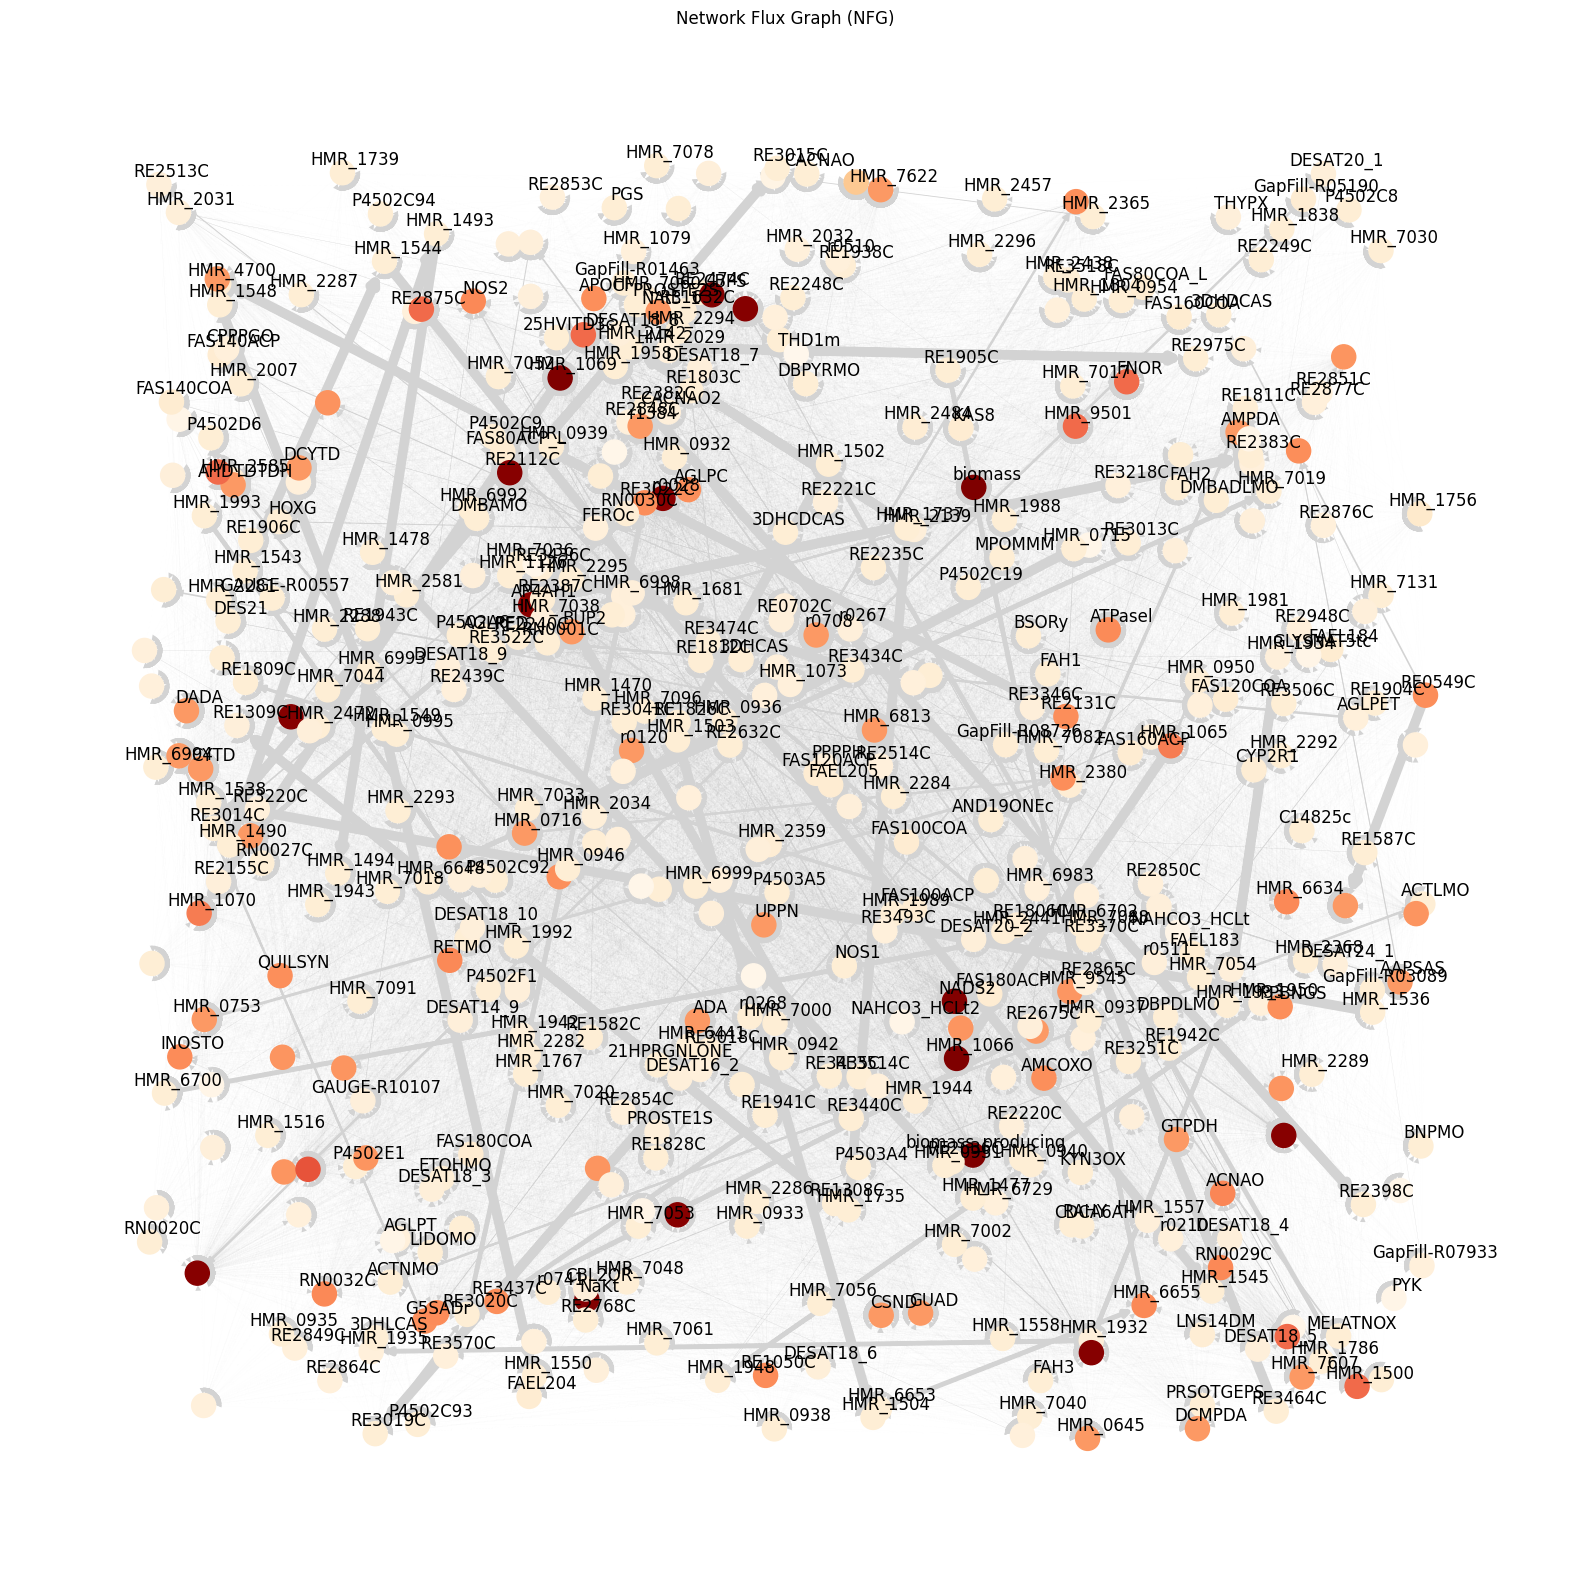

In [21]:
# Convert D matrix into a graph
G = nx.from_numpy_array(D, create_using=nx.DiGraph)

# Create a subgraph containing only the nodes with a degree greater than min_degree
degrees = {node: val for (node, val) in G.degree()} # Calculate the degrees of each node
min_degree = 2500 # Define the minimum degree for a node to be kept.
nodes_to_keep = [node for node, degree in degrees.items() if degree >= min_degree]
G_filtered = G.subgraph(nodes_to_keep)

# Normalize weights for the edges of the nodes
weights = [G_filtered[u][v]['weight'] for u,v in G_filtered.edges()]
normalized_weights = [(w - min(weights)) / (max(weights) - min(weights)) * (7 - 0.001) + 0.001 for w in weights]

# Create a dictionary mapping node indices to reaction names for labeling
reaction_names = np.concatenate(([reaction.id for reaction in model.reactions],
                         [reaction.id + '_r' for reaction in model.reactions]))
node_labels_filtered = {i: reaction_name for i, reaction_name in enumerate(reaction_names) if i in nodes_to_keep}

# Normalize the degrees for color mapping
degrees_filtered = [val for (node, val) in G_filtered.degree()]
normalized_degrees_filtered = [(d - min(degrees_filtered)) / (max(degrees_filtered) - min(degrees_filtered)) for d in degrees_filtered]

# Use a colormap to map normalized degrees to colors
cmap = plt.get_cmap('OrRd')  # Choose a colormap here
node_colors_filtered = [cmap(deg) for deg in normalized_degrees_filtered]

# Plot the graph
fig, ax = plt.subplots(figsize=(20, 20))
pos_filtered = nx.random_layout(G_filtered)
nx.draw(G_filtered, pos_filtered, width=normalized_weights, node_color=node_colors_filtered, edge_color='lightgray', node_size=300, ax=ax)

# Labels
label_pos_filtered = {node: (x + 0.01, y + 0.01) for node, (x, y) in pos_filtered.items()}
nx.draw_networkx_labels(G_filtered, label_pos_filtered, labels=node_labels_filtered, font_size=12, ax=ax)

plt.title('Network Flux Graph (NFG)')
plt.show()

### 3.3 Generation of the "FluxOpenValue" matrix

In [22]:
# Fix the bounds for boundary reactions
model_EX = [i for i, rxn in enumerate(model.reactions) if 'EX_' in rxn.id]
model_SK = [i for i, rxn in enumerate(model.reactions) if 'SK_' in rxn.id]
model_DM = [i for i, rxn in enumerate(model.reactions) if 'DM_' in rxn.id]
for i in model_EX:
    model.reactions[i].bounds = -1000, 1000

for i in model_SK:
    model.reactions[i].bounds = -1000, 1000

for i in model_DM:
    model.reactions[i].bounds = 0, 1000

# Perform pFBA for Biomass on Non-Producing and Producing Cell Lines
model.solver = 'gurobi'
objectives = ['biomass', 'biomass_producing']

fluxes_list = []
for objective in objectives:
    model.objective = objective
    pfba_solution = cobra.flux_analysis.pfba(model)
    fluxes = np.array(pfba_solution.fluxes)
    fluxes_list.append(fluxes)
    
# Stack arrays horizontally
FluxOpenValue = np.column_stack(fluxes_list)

FluxOpenValue

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [44]:
# Count the number of nonzero values in each row
nonzero_counts = np.count_nonzero(FluxOpenValue, axis=1)

# Count the number of rows that contain only zeros
num_all_zero_rows = np.count_nonzero(nonzero_counts == 0)

# Count the number of rows that contain some nonzero value
num_some_nonzero_rows = np.count_nonzero(nonzero_counts != 0)

print("Number of Rxns with no flux:", num_all_zero_rows)
print("Number of Rxns with any flux:", num_some_nonzero_rows)

Number of Rxns with no flux: 10935
Number of Rxns with any flux: 733


### 3.4 Generation of the "Mass Flow Graph (MFG) Matrix"
The MFG provides a versatile framework to create environment-specific metabolic graphs from FBA solutions

In [23]:
# Calculation of the MFG for each pFBA analysis
PageRank = []
for i in range(FluxOpenValue.shape[1]):
    start = time.time()
    v1 = FluxOpenValue[:, i].T

    # unfolding the flux vector
    # creation of vplus and vminus
    vplus = (np.abs(v1) + v1) / 2
    vminus = (np.abs(v1) - v1) / 2

    # creation of v2m
    v2m = np.concatenate((vplus, vminus))

    # creation of J_v
    J_v = S2mplus @ v2m.reshape(-1)

    # calculation of the MFG
    M = (S2mplus * v2m).T @ pinv(np.diag(J_v)) @ (S2mminus * v2m)
    

    # Calculate and store PageRank
    G = nx.from_numpy_array(M, create_using=nx.DiGraph)
    pr = nx.pagerank(G)
    PageRank.append(pr)
    end = time.time()
    print(f"Time taken to go through iteration {i}: {end - start} seconds")
    

# Post-processing of PageRank
df = pd.DataFrame(PageRank)
PageRank = df.values
PageRank = np.array(PageRank).T
PageRankRxns = PageRank[:m, :]
PageRankRxns_back = PageRank[m:, :]

for i in range(m):
    for j in range(PageRankRxns.shape[1]):
        if PageRankRxns_back[i, j] > PageRankRxns[i, j]:
            PageRankRxns[i, j] = PageRankRxns_back[i, j]

Time taken to go through iteration 0: 385.13693380355835 seconds
Time taken to go through iteration 1: 407.2750577926636 seconds


In [38]:
row_sums = PageRankRxns.sum(axis=1)
sorted_indices = np.argsort(row_sums)
counter = 0
for i in sorted_indices[::-1]:
    if (PageRankRxns[i][0] > 4.03646907e-05 and PageRankRxns[i][1] > 4.03210221e-05):
        print(model.reactions[i].id)
        print(PageRankRxns[i])
        counter+=1

print(counter)

r1402
[0.00205114 0.0020954 ]
biomass_producing
[4.03646907e-05 2.00825724e-03]
GAUGE-R00557
[0.00045027 0.00050559]
CYOOm2
[0.00017349 0.00077643]
CYOOm2i
[0.0007671  0.00015123]
FAOXC2051843x
[0.0004129  0.00041049]
FAOXC140120m
[0.0004093  0.00041022]
ATPS4mi
[0.00041336 0.00038129]
ATPS4m
[0.00036101 0.00042949]
r0707
[0.00039071 0.0003821 ]
FAOXC161140m
[0.00037506 0.00038006]
RE3076X
[0.00037296 0.00037194]
BiGGRxn67
[0.00035911 0.00037265]
GTHP_CAT
[0.00035198 0.00035205]
FAOXC8C6m
[0.00034372 0.00034429]
r0463
[0.00032723 0.00032635]
RE1530C
[0.00033987 0.00030928]
CATp
[0.00030199 0.00029891]
TRDR
[0.00029413 0.000304  ]
DESAT18_6
[0.00029766 0.00029945]
TMNDNCCOAtcx
[0.00029228 0.00029474]
r1154
[0.00029121 0.00029534]
SSALxm
[0.00028606 0.00029416]
PIt7
[0.00029506 0.000283  ]
RE1807M
[0.00028248 0.00029106]
r1156
[0.0002791  0.00029357]
NACPRT
[0.00027411 0.00029817]
ALDD21
[0.00028613 0.00028401]
r0173
[0.00028687 0.00028004]
OCCOAtcx
[0.00028185 0.00028387]
GapFill-R07933

In [ ]:
np.savetxt('PageRankRxns.txt', PageRankRxns, fmt='%.10f')

### 3.5 Plotting the "MFG Matrix"

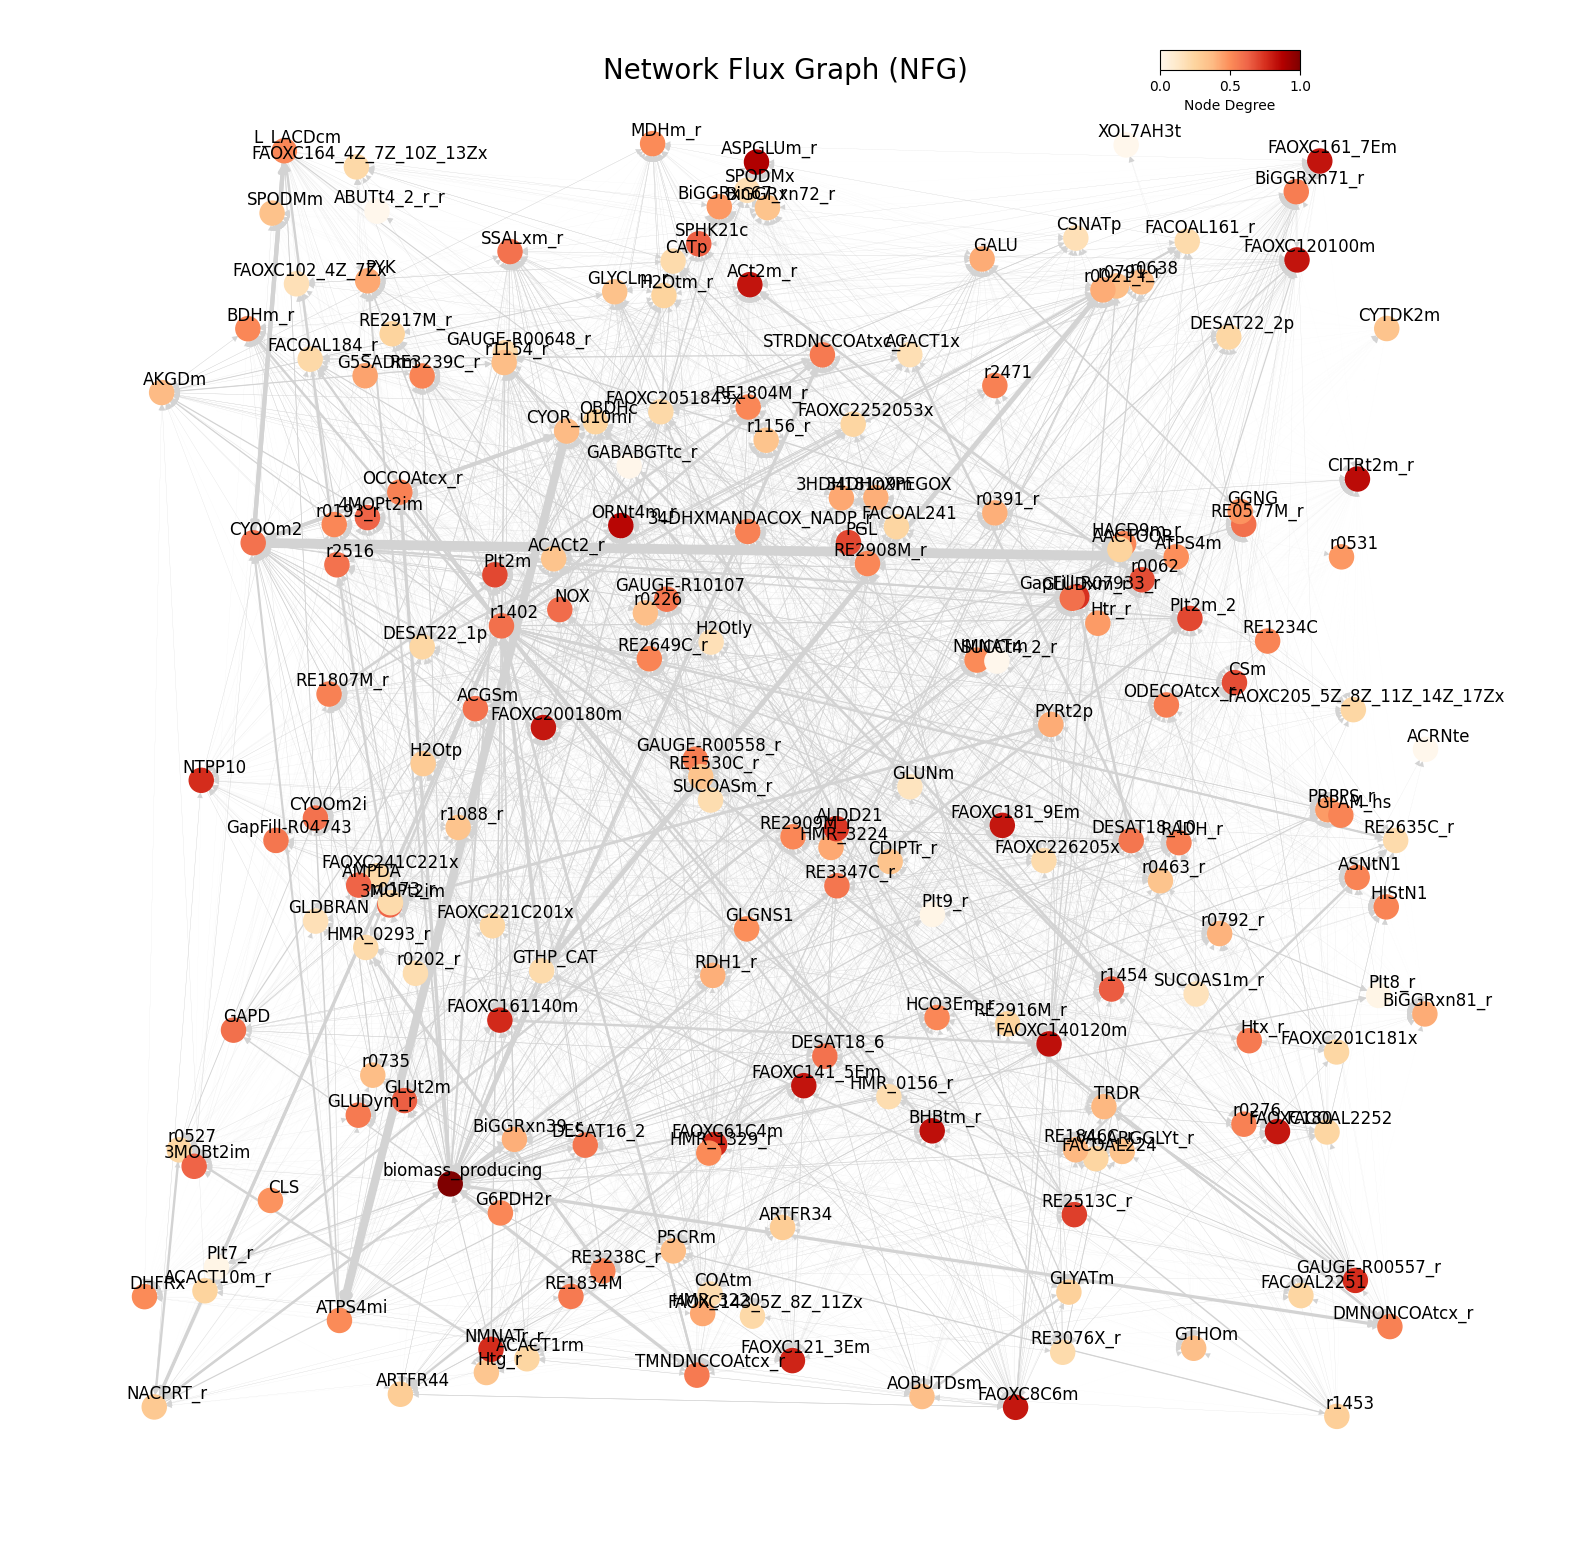

In [56]:
# Convert D matrix into a graph
G = nx.from_numpy_array(M, create_using=nx.DiGraph)

# Create a subgraph containing only the nodes with a degree greater than min_degree
degrees = {node: val for (node, val) in G.degree()} # Calculate the degrees of each node
min_degree = 30 # Define the minimum degree for a node to be kept.
nodes_to_keep = [node for node, degree in degrees.items() if degree >= min_degree]
G_filtered = G.subgraph(nodes_to_keep)

# Normalize weights for the edges of the nodes
weights = [G_filtered[u][v]['weight'] for u,v in G_filtered.edges()]
normalized_weights = [(w - min(weights)) / (max(weights) - min(weights)) * (7 - 0.001) + 0.001 for w in weights]

# Create a dictionary mapping node indices to reaction names for labeling
reaction_names = np.concatenate(([reaction.id for reaction in model.reactions],
                         [reaction.id + '_r' for reaction in model.reactions]))
node_labels_filtered = {i: reaction_name for i, reaction_name in enumerate(reaction_names) if i in nodes_to_keep}

# Normalize the degrees for color mapping
degrees_filtered = [val for (node, val) in G_filtered.degree()]
normalized_degrees_filtered = [(d - min(degrees_filtered)) / (max(degrees_filtered) - min(degrees_filtered)) for d in degrees_filtered]

# Use a colormap to map normalized degrees to colors
cmap = plt.get_cmap('OrRd')  # Choose a colormap here
node_colors_filtered = [cmap(deg) for deg in normalized_degrees_filtered]

# Plot the graph
fig, ax = plt.subplots(figsize=(20, 20))
pos_filtered = nx.random_layout(G_filtered)
nx.draw(G_filtered, pos_filtered, width=normalized_weights, node_color=node_colors_filtered, edge_color='lightgray', node_size=300, ax=ax)
plt.title('Network Flux Graph (NFG)', fontsize=20, y=0.95)

# Labels
label_pos_filtered = {node: (x + 0.01, y + 0.01) for node, (x, y) in pos_filtered.items()}
nx.draw_networkx_labels(G_filtered, label_pos_filtered, labels=node_labels_filtered, font_size=12, ax=ax)

# Add a colorbar as the legend for node colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(normalized_degrees_filtered), vmax=max(normalized_degrees_filtered)))
sm.set_array([])
cbar_ax = fig.add_axes([0.7, 0.85, 0.07, 0.01])
cbar = plt.colorbar(sm, cax=cbar_ax, label='Node Degree', orientation='horizontal')


plt.savefig('network_flux_graph.png')
plt.show()

### Identification of duplicates throught Chemical Formulas

In [ ]:
# Chemical Formula
from cobra.io import read_sbml_model
model = read_sbml_model("iCHOv3_CHO_23052023.xml")

import pandas as pd
data = []

for m in model.metabolites:
    m.name = m.formula
for r in model.reactions:
    if r not in model.exchanges:
        print(r)
        reaction_id = r.id
        reaction_name = r.name
        reaction_formula = r.build_reaction_string(use_metabolite_names=True)
        data.append([reaction_id, reaction_name, reaction_formula])
df = pd.DataFrame(data, columns=['ID', 'Name', 'Reaction'])
df

In [ ]:
for m in model.metabolites:
    m.name = m.formula
for r in model.reactions:
    if r not in model.exchanges:
        reaction_id = r.id
        reaction_name = r.name
        reaction_formula = r.build_reaction_string(use_metabolite_names=True)
        data.append([reaction_id, reaction_name, reaction_formula])
df = pd.DataFrame(data, columns=['ID', 'Name', 'Reaction'])
df

In [ ]:
subset_duplicates = df[df.duplicated(subset='Reaction', keep=False)].reset_index(drop=True)
subset_duplicates = subset_duplicates.sort_values(by=['Reaction'])
subset_duplicates.to_excel('Test.xlsx')

for index, n in enumerate(subset_duplicates['Reaction']):
    next_value = subset_duplicates['Reaction'][index + 1]
    if n == next_value:
        print(subset_duplicates['Name'][index])

        

### Duplicates identified

In [ ]:
print(model.metabolites.get_by_id('uppg1_c').name, model.metabolites.get_by_id('HC01609_c').name)
for r in model.metabolites.get_by_id('uppg1_c').reactions:
    print(r)
print('------')
for r in model.metabolites.get_by_id('HC01609_c').reactions:
    print(r)
# Based on reations HMR_4772 and GapFill-R04972, HC01609_c and uppg1_c  are the same 

In [ ]:
print(model.metabolites.get_by_id('HC02187_c').name, model.metabolites.get_by_id('triodthy_c').name)
for r in model.metabolites.get_by_id('HC02187_c').reactions:
    print(r)
print('------')
for r in model.metabolites.get_by_id('triodthy_c').reactions:
    print(r)
# Based on reations HMR_6834 and HMR_6826, triodthy_c and HC02187_c  are the same 